In [136]:
# standard imports
import matplotlib.pyplot as plt
import pickle

# third party imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

%matplotlib inline

In [2]:
with open(r'all_movie_data_cleaned_3.pkl', 'rb') as inpick:
    data = pickle.load(inpick)

In [3]:
data['year'] = data['adj_release'].map(lambda x: x.year)
data['month'] = data['adj_release'].map(lambda x: x.month)

In [4]:
data['num_open_theatres'] = data['num_open_theatres'].map(lambda x: int(x.replace(',', '')))

In [5]:
data.head()

,budget,distributor,domestic,foreign,genre,num_open_theatres,rating,release,runtime,title,adj_release,worldwide_revenue,worldwide_profit,adj_budget,adj_worldwide_revenue,year,month
/movies/?id=1000ae.htm,130000000.0,Sony / Columbia,62472100.0,183321030.0,Sci-Fi,3401,PG-13,"May 31, 2013",100.0,After Earth,2013-05-31,245793130.0,115793130.0,1.341361e+08,2.536134e+08,2013,5
/movies/?id=100foot.htm,22000000.0,Buena Vista,58003200.0,34640000.0,Drama,2023,PG,"August 8, 2014",122.0,The Hundred-Foot Journey,2014-08-08,92643200.0,70643200.0,2.233759e+07,9.406483e+07,2014,8
/movies/?id=1952.htm,190000000.0,Buena Vista,95801600.0,115718000.0,Sci-Fi,3972,PG,"May 22, 2015",130.0,Tomorrowland,2015-05-22,211519600.0,21519600.0,1.926870e+08,2.145109e+08,2015,5
/movies/?id=3burialsofmelquiadesestrada.htm,15000000.0,Sony Classics,6639900.0,4017680.0,Western,5,R,"December 14, 2005",121.0,The Three Burials of Melquiades Estrada,2005-12-14,10657580.0,-4342420.0,1.846230e+07,1.311757e+07,2005,12
/movies/?id=40shadesofblue.htm,1500000.0,Vitagraph,102300.0,96741.0,Drama,3,R,"September 30, 2005",108.0,Forty Shades of Blue,2005-09-30,199041.0,-1300959.0,1.846230e+06,2.449837e+05,2005,9


In [6]:
corr_df = data[['adj_budget', 'num_open_theatres', 'runtime', 'adj_worldwide_revenue', 'genre', 'rating']].corr()

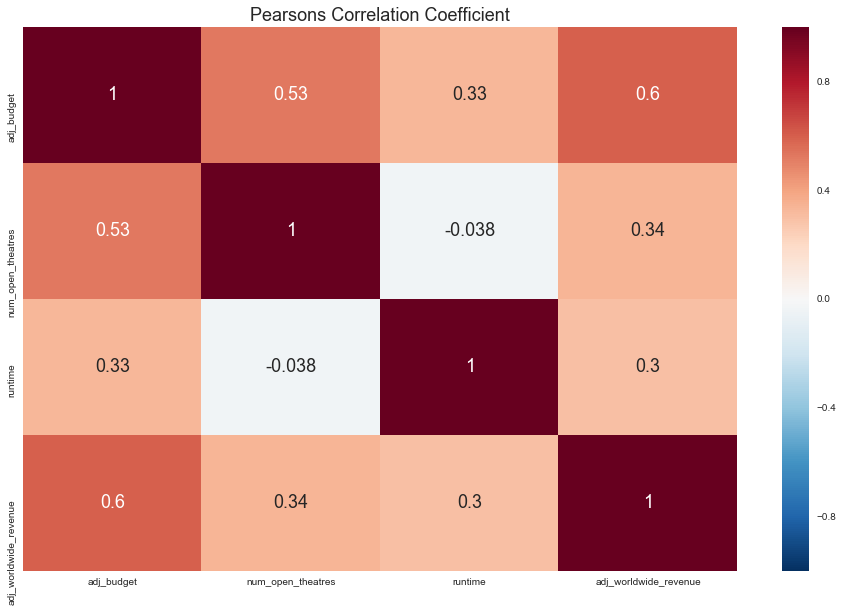

In [7]:
fig, ax = plt.subplots(figsize=(16,10)) 
ax.set_title('Pearsons Correlation Coefficient', fontsize=18)
sns.heatmap(data=corr_df, ax=ax, annot=True, annot_kws={'fontsize':18})

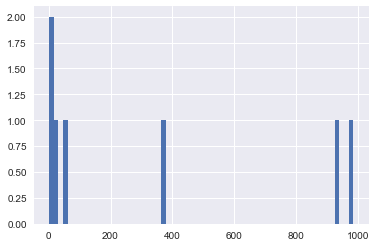

In [8]:
data['rating'].value_counts().hist(bins=data['genre'].nunique())

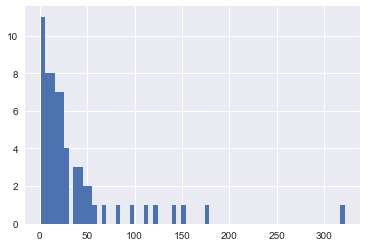

In [9]:
data['genre'].value_counts().hist(bins=data['genre'].nunique())

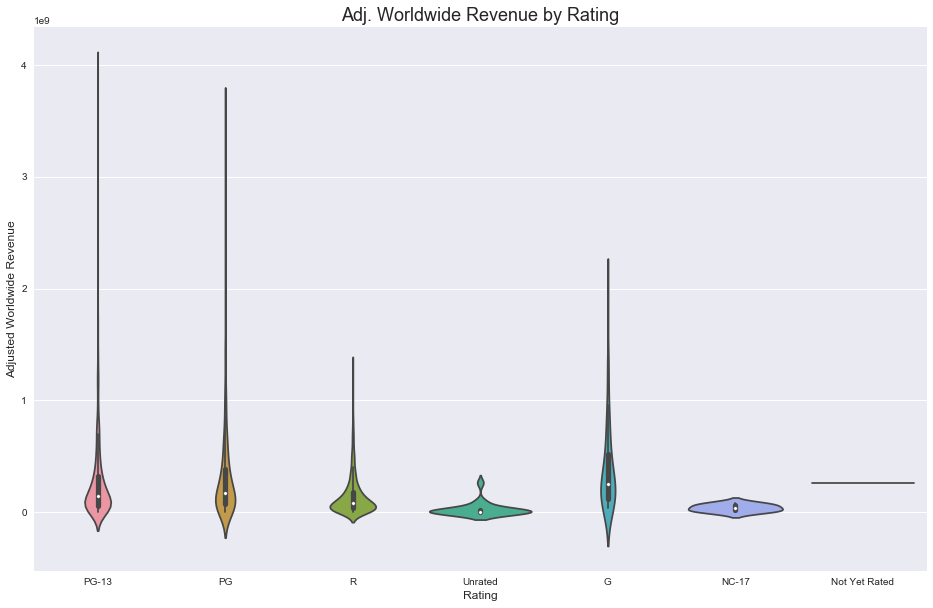

In [10]:
fig, ax = plt.subplots(figsize=(16,10)) 
ax.set_title('Adj. Worldwide Revenue by Rating', fontsize=18)

sns.violinplot(x=data['rating'], y=data['adj_worldwide_revenue'], ax=ax, rot=90)
ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Adjusted Worldwide Revenue', fontsize=12)

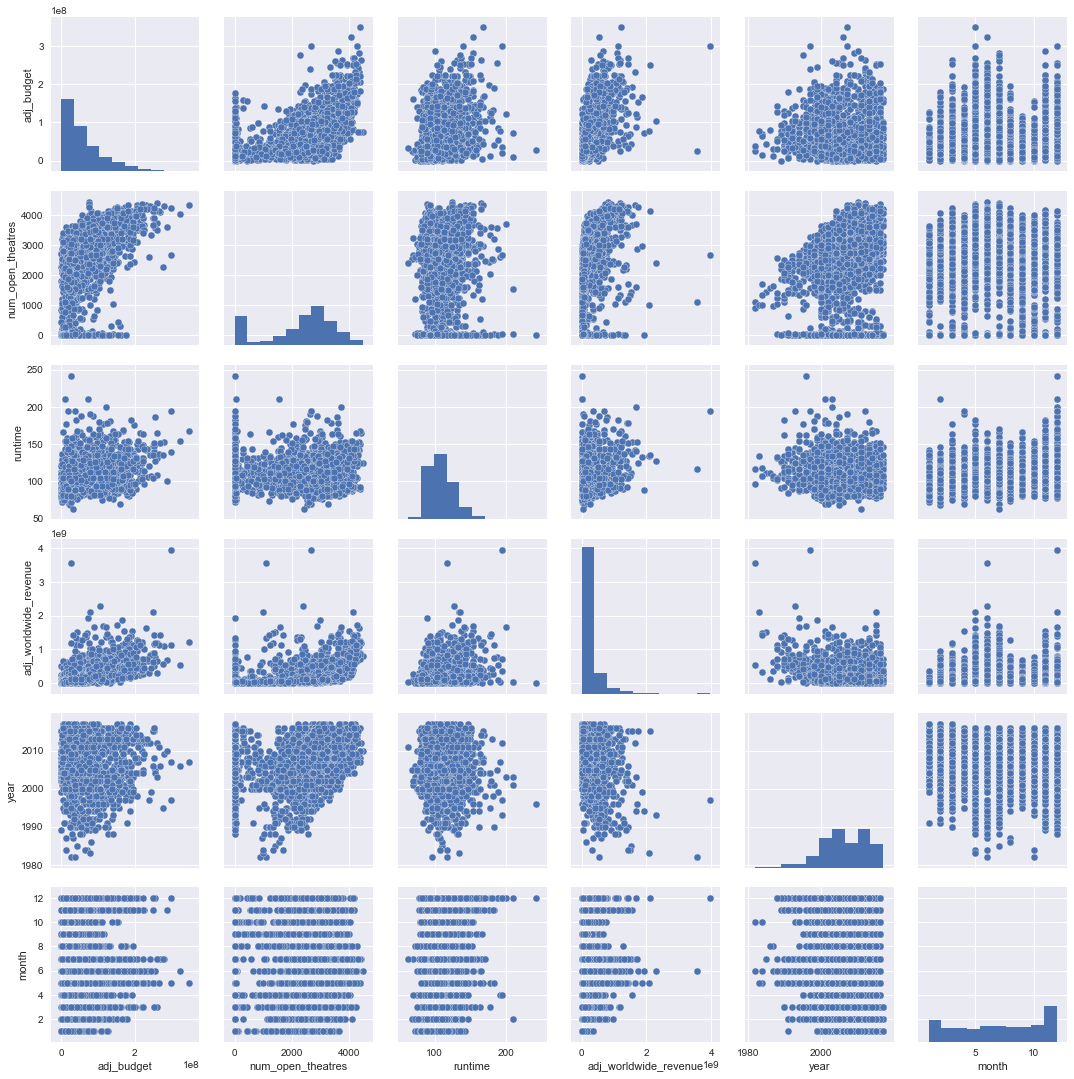

In [11]:
sns.pairplot(data[['adj_budget', 'num_open_theatres', 'runtime', 'adj_worldwide_revenue', 'genre', 'rating', 'year', 'month']])

# Initial Model

In [12]:
data.head()

,budget,distributor,domestic,foreign,genre,num_open_theatres,rating,release,runtime,title,adj_release,worldwide_revenue,worldwide_profit,adj_budget,adj_worldwide_revenue,year,month
/movies/?id=1000ae.htm,130000000.0,Sony / Columbia,62472100.0,183321030.0,Sci-Fi,3401,PG-13,"May 31, 2013",100.0,After Earth,2013-05-31,245793130.0,115793130.0,1.341361e+08,2.536134e+08,2013,5
/movies/?id=100foot.htm,22000000.0,Buena Vista,58003200.0,34640000.0,Drama,2023,PG,"August 8, 2014",122.0,The Hundred-Foot Journey,2014-08-08,92643200.0,70643200.0,2.233759e+07,9.406483e+07,2014,8
/movies/?id=1952.htm,190000000.0,Buena Vista,95801600.0,115718000.0,Sci-Fi,3972,PG,"May 22, 2015",130.0,Tomorrowland,2015-05-22,211519600.0,21519600.0,1.926870e+08,2.145109e+08,2015,5
/movies/?id=3burialsofmelquiadesestrada.htm,15000000.0,Sony Classics,6639900.0,4017680.0,Western,5,R,"December 14, 2005",121.0,The Three Burials of Melquiades Estrada,2005-12-14,10657580.0,-4342420.0,1.846230e+07,1.311757e+07,2005,12
/movies/?id=40shadesofblue.htm,1500000.0,Vitagraph,102300.0,96741.0,Drama,3,R,"September 30, 2005",108.0,Forty Shades of Blue,2005-09-30,199041.0,-1300959.0,1.846230e+06,2.449837e+05,2005,9


In [13]:
data['pop_month'] = data['month'].map(lambda x: 1 if x in [5,6,7,11,12] else 0)

In [14]:
data

,budget,distributor,domestic,foreign,genre,num_open_theatres,rating,release,runtime,title,adj_release,worldwide_revenue,worldwide_profit,adj_budget,adj_worldwide_revenue,year,month,pop_month
/movies/?id=1000ae.htm,130000000.0,Sony / Columbia,62472100.0,183321030.0,Sci-Fi,3401,PG-13,"May 31, 2013",100.0,After Earth,2013-05-31,245793130.0,115793130.0,1.341361e+08,2.536134e+08,2013,5,1
/movies/?id=100foot.htm,22000000.0,Buena Vista,58003200.0,34640000.0,Drama,2023,PG,"August 8, 2014",122.0,The Hundred-Foot Journey,2014-08-08,92643200.0,70643200.0,2.233759e+07,9.406483e+07,2014,8,0
/movies/?id=1952.htm,190000000.0,Buena Vista,95801600.0,115718000.0,Sci-Fi,3972,PG,"May 22, 2015",130.0,Tomorrowland,2015-05-22,211519600.0,21519600.0,1.926870e+08,2.145109e+08,2015,5,1
/movies/?id=3burialsofmelquiadesestrada.htm,15000000.0,Sony Classics,6639900.0,4017680.0,Western,5,R,"December 14, 2005",121.0,The Three Burials of Melquiades Estrada,2005-12-14,10657580.0,-4342420.0,1.846230e+07,1.311757e+07,2005,12,1
/movies/?id=40shadesofblue.htm,1500000.0,Vitagraph,102300.0,96741.0,Drama,3,R,"September 30, 2005",108.0,Forty Shades of Blue,2005-09-30,199041.0,-1300959.0,1.846230e+06,2.449837e+05,2005,9,0
/movies/?id=abandon.htm,25000000.0,Paramount,15971500.0,1574536.0,Thriller,2341,PG-13,"October 18, 2002",99.0,Abandon,2002-10-18,17546036.0,-7453964.0,3.340777e+07,2.344696e+07,2002,10,0
/movies/?id=abduction11.htm,35000000.0,Lionsgate,30598700.0,54000000.0,Action,3118,PG-13,"September 23, 2011",106.0,Abduction,2011-09-23,84598700.0,49598700.0,3.740084e+07,9.040177e+07,2011,9,0
/movies/?id=aboutaboy.htm,30000000.0,Universal,61614900.0,89164177.0,Comedy / Drama,1207,PG-13,"May 17, 2002",100.0,About a Boy,2002-05-17,150779077.0,120779077.0,4.008933e+07,2.014877e+08,2002,5,1
/movies/?id=aboutlastnight14.htm,12500000.0,Sony / Screen Gems,52839600.0,365000.0,Romantic Comedy,2253,R,"February 14, 2014",100.0,About Last Night (2014),2014-02-14,53204600.0,40704600.0,1.269182e+07,5.402104e+07,2014,2,0
/movies/?id=aboutschmidt.htm,30000000.0,New Line,93359300.0,40818269.0,Comedy / Drama,6,R,"December 13, 2002",124.0,About Schmidt,2002-12-13,134177569.0,104177569.0,4.008933e+07,1.793030e+08,2002,12,1


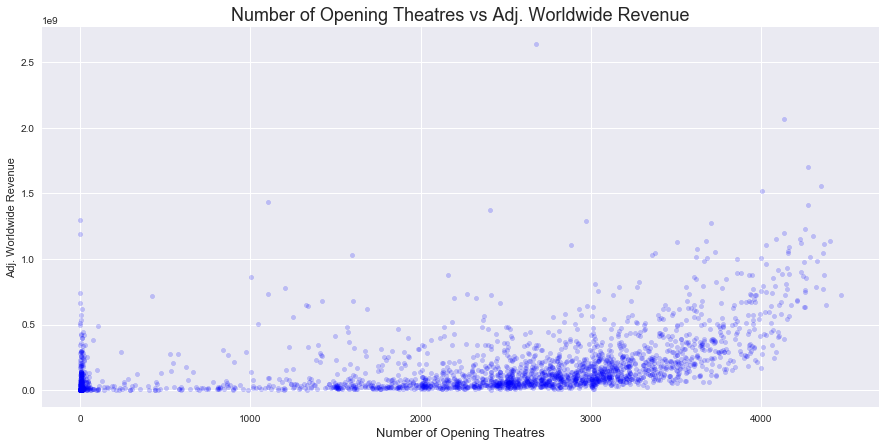

In [15]:
plt.figure(figsize=(15,7))
sns.plt.title('Number of Opening Theatres vs Adj. Worldwide Revenue', fontsize=18)
sns.plt.xlabel('Number of Opening Theatres', fontsize=13)
sns.plt.ylabel('Adj. Worldwide Revenue')
sns.plt.scatter(data['num_open_theatres'], data['worldwide_revenue'], color='b', s=20, alpha= .2)

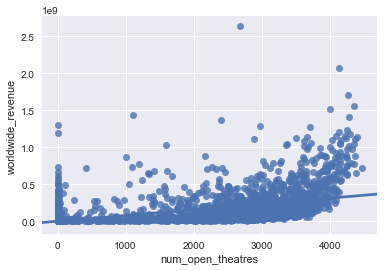

In [16]:
sns.regplot(data['num_open_theatres'], data['worldwide_revenue'])

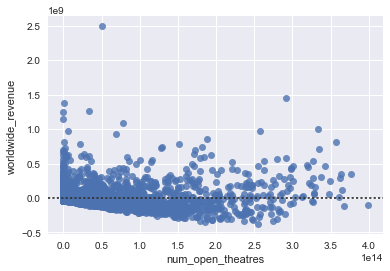

In [17]:
sns.residplot(np.power(data['num_open_theatres'], 4), data['worldwide_revenue'])

In [44]:
data['worldwide_revenue_sqrt'] = data['worldwide_revenue'].map(lambda x: np.power(x, .5))
data['adj_budget_sqrt'] = data['adj_budget'].map(lambda x: np.power(x, .5))
data['num_open_theatres_e4'] = data['num_open_theatres'].map(lambda x: np.power(x, 4))


In [111]:
lm1 = smf.ols('np.power(worldwide_revenue, .5) ~ np.power(adj_budget, .5)+np.power(num_open_theatres, 4)+pop_month+np.power(runtime,1)', data=data)
# Fit the model
fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     np.power(worldwide_revenue, .5)   R-squared:                       0.603
Model:                                         OLS   Adj. R-squared:                  0.602
Method:                              Least Squares   F-statistic:                     898.2
Date:                             Sat, 22 Apr 2017   Prob (F-statistic):               0.00
Time:                                     14:57:04   Log-Likelihood:                -23268.
No. Observations:                             2371   AIC:                         4.655e+04
Df Residuals:                                 2366   BIC:                         4.657e+04
Df Model:                                        4                                         
Covariance Type:                         nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
Intercept                      -2503.5319    535.077     -4.679      0.000     -3552.800 -1454.263
np.power(adj_budget, .5)           0.7022      0.040     17.725      0.000         0.625     0.780
np.power(num_open_theatres, 4)   4.08e-11   1.66e-12     24.629      0.000      3.76e-11  4.41e-11
pop_month                       2246.9314    194.729     11.539      0.000      1865.074  2628.789
np.power(runtime, 1)              47.0211      5.197      9.048      0.000        36.830    57.212
==============================================================================
Omnibus:                      605.436   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1963.606
Skew:                           1.269   Prob(JB):                         0.00
Kurtosis:                       6.666   Cond. No.                     5.81e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# ax = sns.regplot(x="adj_budget", y="worldwide_revenue", data=data)

In [45]:
data.head()

,budget,distributor,domestic,foreign,genre,num_open_theatres,rating,release,runtime,title,...,worldwide_revenue,worldwide_profit,adj_budget,adj_worldwide_revenue,year,month,pop_month,worldwide_revenue_sqrt,adj_budget_sqrt,num_open_theatres_e4
/movies/?id=1000ae.htm,130000000.0,Sony / Columbia,62472100.0,183321030.0,Sci-Fi,3401,PG-13,"May 31, 2013",100.0,After Earth,...,245793130.0,115793130.0,1.341361e+08,2.536134e+08,2013,5,1,15677.790980,11581.715289,133790885373601
/movies/?id=100foot.htm,22000000.0,Buena Vista,58003200.0,34640000.0,Drama,2023,PG,"August 8, 2014",122.0,The Hundred-Foot Journey,...,92643200.0,70643200.0,2.233759e+07,9.406483e+07,2014,8,0,9625.133765,4726.266466,16748793615841
/movies/?id=1952.htm,190000000.0,Buena Vista,95801600.0,115718000.0,Sci-Fi,3972,PG,"May 22, 2015",130.0,Tomorrowland,...,211519600.0,21519600.0,1.926870e+08,2.145109e+08,2015,5,1,14543.713419,13881.174717,248906913382656
/movies/?id=3burialsofmelquiadesestrada.htm,15000000.0,Sony Classics,6639900.0,4017680.0,Western,5,R,"December 14, 2005",121.0,The Three Burials of Melquiades Estrada,...,10657580.0,-4342420.0,1.846230e+07,1.311757e+07,2005,12,1,3264.594921,4296.778261,625
/movies/?id=40shadesofblue.htm,1500000.0,Vitagraph,102300.0,96741.0,Drama,3,R,"September 30, 2005",108.0,Forty Shades of Blue,...,199041.0,-1300959.0,1.846230e+06,2.449837e+05,2005,9,0,446.140113,1358.760593,81


In [49]:
feat_cols = ['pop_month', 'runtime', 'num_open_theatres_e4', 'adj_budget_sqrt']

In [59]:
target_col = ['worldwide_revenue_sqrt']

In [60]:
X = data[feat_cols]
y = data[target_col]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [123]:
model = ElasticNetCV(alphas=[.001, .01, .1, 1, 10, 100, 1000], l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=10, normalize=True)

In [124]:
fitted = model.fit(X_train, y_train)

/Users/bstraate/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
preds = fitted.predict(X_test)

In [126]:
preds = preds.reshape(-1,1)

In [127]:
y_test.shape

(783, 1)

In [128]:
preds.shape

(783, 1)

In [138]:
fitted.score(X_test, y_test)

0.63551936067915737

In [134]:
model.get_params()

{'alphas': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'copy_X': True,
 'cv': 10,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': 1,
 'normalize': True,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [139]:
r2_score(y_test, preds)

0.63551936067915737

In [144]:
model.l1_ratio_

0.98999999999999999

In [143]:
fitted.l1_ratio_

0.98999999999999999

In [ ]:
# fit1.resid.plot(figsize=(16,8))

In [ ]:
np.log(10)

In [ ]:
plt.figure(figsize=(15,7))
plt.xlabel('sqrt(Adjusted Budget)')
plt.ylabel('sqrt(Adjusted Worldwide Revenue)')
plt.title('Adjusted Worldwide Revenue by Month', size=16)
sns.violinplot(data['month'], data['worldwide_revenue'])

In [ ]:
data.describe()

In [ ]:
data[data['genre'].value_counts()

In [ ]:
# to do: show math on my blog post
plt.figure(figsize=(15,7))
plt.xlabel('sqrt(Adjusted Budget)')
plt.ylabel('sqrt(Adjusted Worldwide Revenue)')
plt.title('Month by Adjusted Worldwide Revenue', size=16)
sns.violinplot(data['genre'], data['worldwide_revenue'])
sns.plt.xticks(rotation=90)

In [ ]:
data[data['adj_worldwide_revenue']<=500000]

In [ ]:
pd.get_dummies(data['genre']).describe()

In [ ]:
plt.figure(figsize=(15,7))


sns.regplot(np.sqrt(data['adj_budget']), np.sqrt(data['worldwide_revenue']), color='b', scatter_kws={'s':20, 'alpha': .2}, line_kws={'color':'r'})
plt.xlabel('log(Adjusted Budget)')
plt.ylabel('log(Adjusted Worldwide Revenue)')
plt.title('Adjusted Budget vs Adjusted Worldwide Revenue - Transformed', size=16)

In [ ]:
plt.figure(figsize=(15,7))


sns.residplot(np.sqrt(data['adj_budget']), np.sqrt(data['worldwide_revenue']), color='b', scatter_kws={'s':20, 'alpha': .2}, line_kws={'color':'r'})
plt.xlabel('sqrt(Adjusted Budget)')
plt.ylabel('Residuals')
plt.title('Regression Residuals - Sqrt Transform', size=16)

In [ ]:
data.head()

In [ ]:
#try distributor and genre

In [ ]:
# plt.hist(np.array(fit1.resid), bins=100)

In [ ]:
ridge = RidgeCV()

In [ ]:
model = ridge.fit(data)